In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data  = pd.read_csv("desease_dataset.csv")
data_sevrity = pd.read_csv("Symptom-severity.csv")
print("Data:", data.shape)
print("data_severity:", data_sevrity.shape)

Data: (4920, 18)
data_severity: (133, 2)


In [4]:
data_sevrity.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [5]:
symp_cols = data[data.columns[1:]].columns

In [6]:

values = []
for col in symp_cols :
    values = values + list(data[symp_cols[0]].values)
    

In [7]:
counter = Counter(values)

In [8]:
result = pd.Series(dict(counter))

<AxesSubplot: >

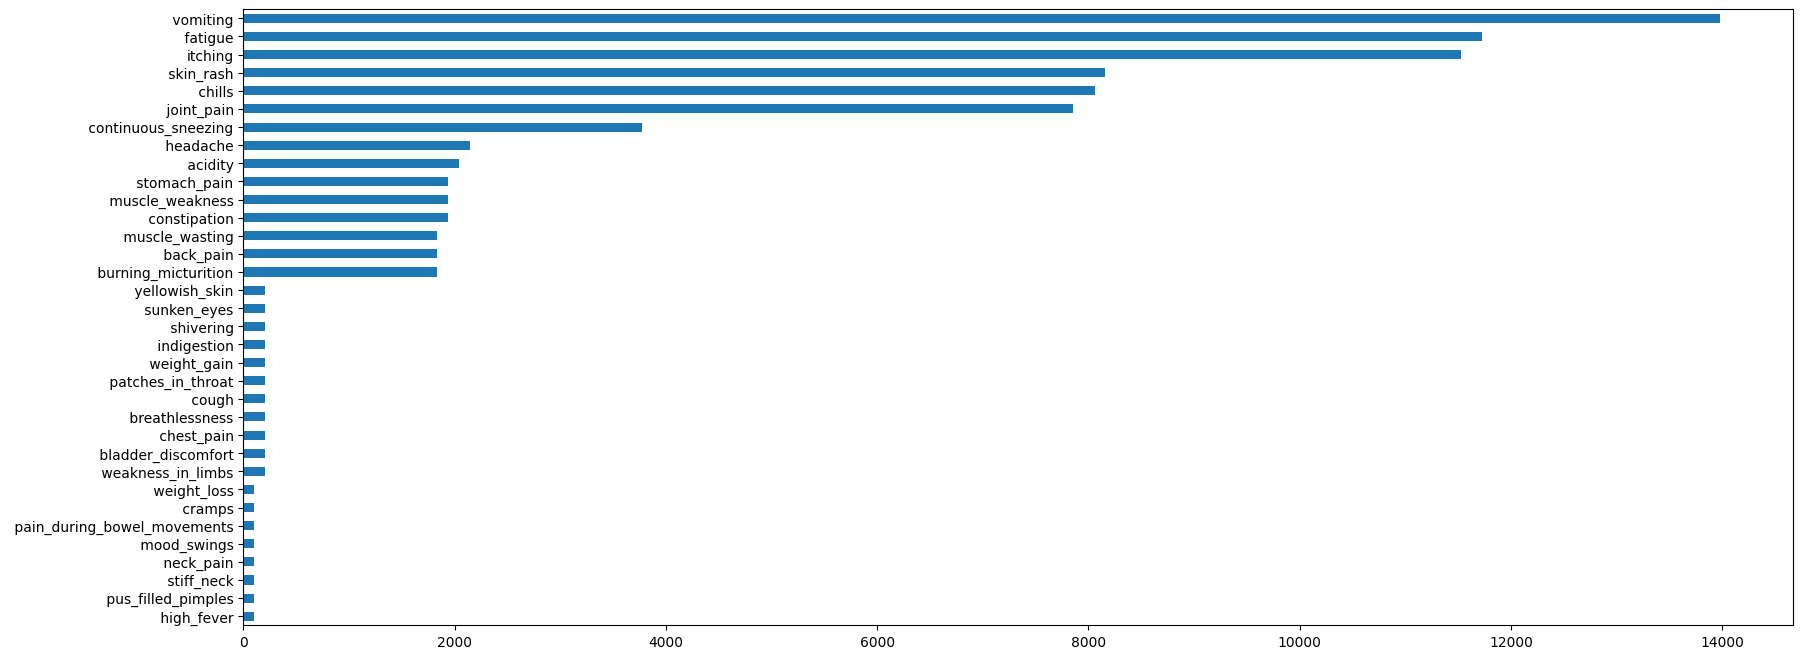

In [9]:
result.sort_values(ascending=True).plot(kind='barh',figsize=(20,8))

In [10]:
for ind in data_sevrity.index:
    continue
   #
   # print(data_sevrity['Symptom'][ind],data_sevrity['weight'][ind])

In [11]:
#convert data_severity to dictionnary
data_dict = data_sevrity.set_index('Symptom').T.to_dict()

C:\Users\user\AppData\Local\Temp\ipykernel_13752\2556765367.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = data_sevrity.set_index('Symptom').T.to_dict()


In [12]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

In [13]:
new_df = remove_space_between_word(data)
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

def encode_data(dataset , data_dict_weigth):
    cols = dataset.columns
    for columnName in cols:
        for i in range(len(dataset[columnName])):
            try:
            #print(data_dict[data2[columnName][i]]["weight"])
                dataset[columnName][i] = data_dict[dataset[columnName][i]]["weight"]
            except:
                pass
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset

In [15]:
df = encode_data(new_df , data_dict)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal_infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal_infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal_infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal_infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.dtypes

Disease       object
Symptom_1      int64
Symptom_2      int64
Symptom_3      int64
Symptom_4      int64
Symptom_5      int64
Symptom_6      int64
Symptom_7      int64
Symptom_8      int64
Symptom_9      int64
Symptom_10     int64
Symptom_11     int64
Symptom_12     int64
Symptom_13     int64
Symptom_14     int64
Symptom_15     int64
Symptom_16     int64
Symptom_17     int64
dtype: object

In [17]:
#check if all Symptoms are replace by their weigth
names = []
for col in df.columns:
    if(col != "Disease"):
        for i in range(len(df[col])):
            if (type(df[col][i]) == str ):
                if df[col][i] not in names :
                    names.append(df[col][i])
                    
print(" no replace are :" , names)  

 no replace are : []


In [18]:
df_data = df.drop('Disease' , axis =1)
label = data["Disease"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_data, label, shuffle=True, train_size = 0.70)
knn = KNeighborsClassifier(n_neighbors=18)
randomFC = RandomForestClassifier()
knn.fit(x_train, y_train)
result = knn.predict(x_test)

print('F1-score% =', f1_score(y_test, result, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, result)*100)


F1-score% = 95.89322257364243 | Accuracy% = 96.2059620596206


In [20]:
qw=pd.DataFrame([[1,2,3,4,5,6,1,2,3,4,5,6,7,2,3,4,5]],columns=['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'])

In [21]:
qw.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,2,3,4,5,6,1,2,3,4,5,6,7,2,3,4,5


In [22]:
x_train.columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

In [23]:
output = knn.predict(qw)

In [24]:
output[0]

'Tuberculosis'